In [1]:
from hari_plotter import (
    Simulation,
    Interface,
    Plotter,
    Clustering,
)
import os

In [2]:
os.makedirs("save_dir", exist_ok=True)

In [3]:
Clustering.available_clustering_methods()

['Interval Clustering', 'K-Means Clustering']

In [4]:
cl = {
    "clustering_method": "K-Means Clustering",
    "clustering_parameters": ["Opinion", "Neighbor mean opinion"],
    "scale": ["Tanh", "Tanh"],
    "n_clusters": 2,
}

In [5]:
S = Simulation.from_dir("big_test")
S.group(num_intervals=3, interval_size=1)

In [6]:
S

Simulation(model=ActivityDrivenModel(params={'dt': 0.01, 'm': 10, 'eps': 0.01, 'gamma': 2.1, 'reciprocity': 0.5, 'homophily': 3.0, 'alpha': 3.0, 'K': 3}), rng_seed=12345678019, max_iterations=2000, network=['big_test/network_0.txt', 'big_test/network_1.txt', 'big_test/network_2.txt'])

In [7]:
interface = Interface.create_interface(S)

In [8]:
interface.cluster_tracker.track_clusters(cl)

[{0: {'Cluster 0': 'Cluster 1', 'Cluster 1': 'Cluster 0'},
  1: {'Cluster 0': 'Cluster 1', 'Cluster 1': 'Cluster 0'},
  2: {'Cluster 0': 'Cluster 0', 'Cluster 1': 'Cluster 1'}}]

In [9]:
plotter = Plotter(interface)
print(plotter.available_plot_types_hint)

Histogram: + 
Hexbin: + 
Scatter: + 
Clustering: Centroids: + 
Clustering: Fill: + 
Clustering: Degree of Membership: + 
Clustering: Density Plot: + 
Static: Time line: + 
Static: Node lines: + 
Static: Graph line: + 
Static: Graph Range: + 
Static: Clustering Line: + 
Static: Clustering Range: + 
Static: Opinions: + 



In [10]:
plotter.add_plot(
    "Static: Time line",
    {
        "parameters": ["Time", "Opinion"],
    },
    row=1,
    col=0,
)
plotter.add_plot(
    "Static: Time line",
    {
        "parameters": ["Time", "Opinion"],
    },
    row=2,
    col=1,
)

plotter.add_plot(
    "Static: Clustering Line",
    {
        "parameter": "Opinion",
        "scale": ["Linear", "Tanh"],
        "clustering_settings": cl,
        "show_legend": False,
        "color": {
            "mode": "Cluster Parameter Color",
            "settings": {
                "clustering_settings": cl,
                "parameter": "Opinion",
                "group_number": -1,
                "None Color": "",
            },
        },
    },
    row=1,
    col=0,
)

plotter.add_plot(
    "Static: Clustering Range",
    {
        "parameter": "Opinion",
        "range_parameter": "Opinion Standard Deviation",
        "clustering_settings": cl,
        "scale": ["Linear", "Tanh"],
        "color": {
            "mode": "Cluster Parameter Color",
            "settings": {
                "clustering_settings": cl,
                "parameter": "Opinion",
                "group_number": -1,
                "None Color": "",
            },
        },
    },
    row=1,
    col=0,
)

plotter.add_plot(
    "Histogram",
    {
        "parameters": ["Opinion"],
        "show_x_label": False,
        "scale": ["Tanh", "Linear"],
    },
    row=0,
    col=1,
)

plotter.add_plot(
    "Histogram",
    {
        "parameters": ["Neighbor mean opinion"],
        "rotated": True,
        "show_y_label": False,
        "scale": ["Linear", "Tanh"],
    },
    row=1,
    col=2,
)

plotter.add_plot(
    "Clustering: Fill",
    {
        "parameters": ["Opinion", "Neighbor mean opinion"],
        "clustering_settings": cl,
        "scale": ["Tanh", "Tanh"],
        "fill_color": {
            "mode": "Cluster Parameter Color",
            "settings": {
                "clustering_settings": cl,
                "parameter": "Opinion"
            },
        },
    },
    row=1,
    col=1,
)

plotter.add_plot(
    "Scatter",
    {
        "parameters": ["Opinion", "Neighbor mean opinion"],
        "scale": ["Tanh", "Tanh"],
        "color": {
            "mode": "Cluster Parameter Color",
            "settings": {
                "clustering_settings": cl,
                "parameter": "Opinion"
            },
        },
        "marker": {
            "mode": "Cluster Marker",
            "settings": {
                "clustering_settings": cl
            }
        },
    },
    row=1,
    col=1,
)

plotter.add_plot(
    "Static: Node lines",
    {
        "parameters": ["Time", "Opinion"],
        "scale": ["Linear", "Tanh"],
        "color": {
            "mode": "Cluster Parameter Color",
            "settings": {
                "clustering_settings": cl,
                "parameter": "Opinion",
                "group_number": -1,
                "None Color": "",
            },
        },
    },
    row=2,
    col=1,
)

plotter.add_plot(
    "Scatter",
    {
        "parameters": ["Opinion", "Activity"],
        # "marker": "x",
        "scale": ["Linear", "Linear"],
        "color": {
            "mode": "Parameter Colormap",
            "settings": {
                "parameter": "Opinion density",
                "scale": ("Linear", )
            },
        },
    },
    row=2,
    col=0,
)

plotter.size_ratios = [
    [4, 4, 1],
    [
        1,
        4,
        4,
    ],
]

print("\n==========", plotter.info(), "\n==========")


(0, 0)
Empty cell
(0, 1)

(0, 2)
Empty cell
(1, 0)

(1, 1)

(1, 2)

(2, 0)

(2, 1)

(2, 2)
Empty cell 


/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:897: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 0] = np.arctanh(mesh_points_scaled[:, 0])
/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:899: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 1] = np.arctanh(mesh_points_scaled[:, 1])


(<Figure size 1800x1800 with 9 Axes>,
 array([[<Axes: >, <Axes: ylabel='Density'>, <Axes: >],
        [<Axes: xlabel='Time', ylabel='Parameter'>,
         <Axes: xlabel='Node Opinion', ylabel='Node Neighbor Mean Opinion'>,
         <Axes: xlabel='Density'>],
        [<Axes: xlabel='Node Opinion', ylabel='Node Activity'>,
         <Axes: xlabel='Time', ylabel='Node Opinion'>, <Axes: >]],
       dtype=object))

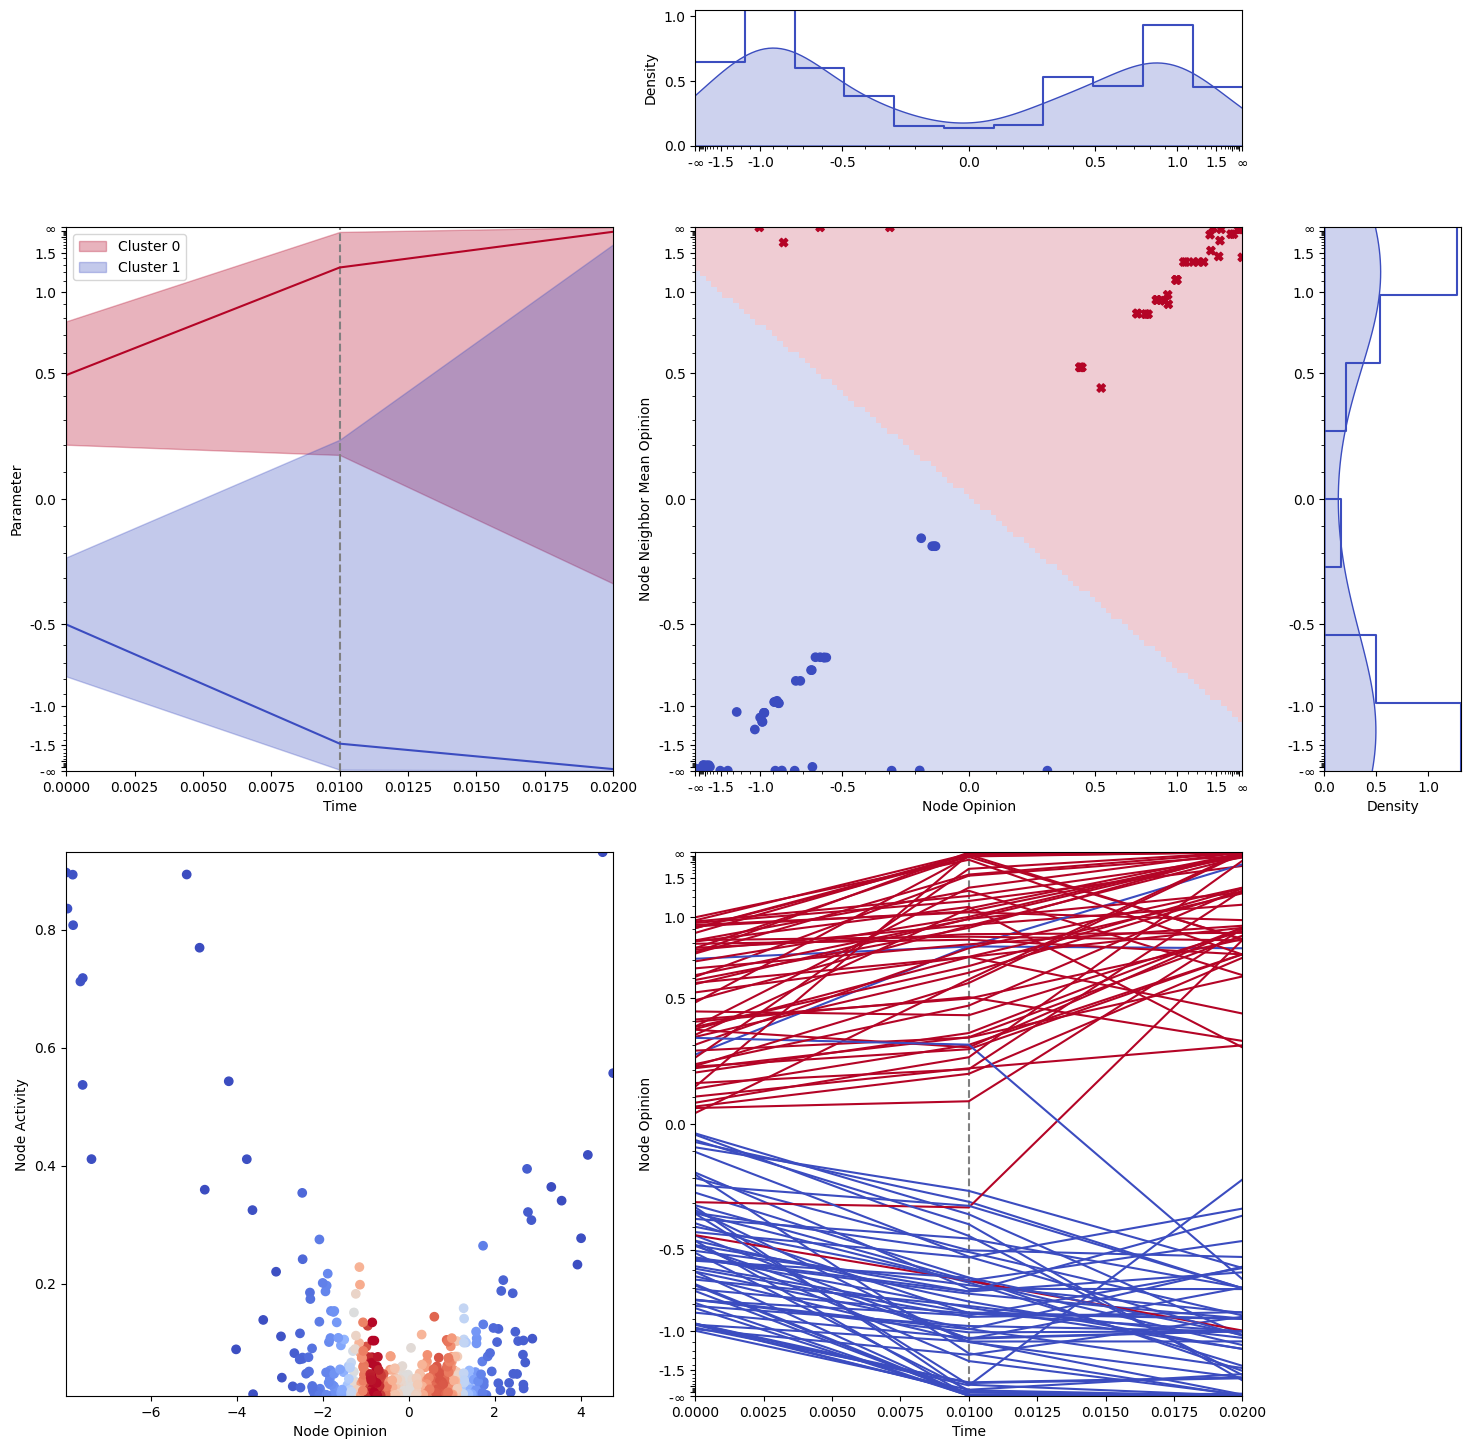

In [11]:
plotter.plot(1)

/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:897: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 0] = np.arctanh(mesh_points_scaled[:, 0])
/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:899: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 1] = np.arctanh(mesh_points_scaled[:, 1])


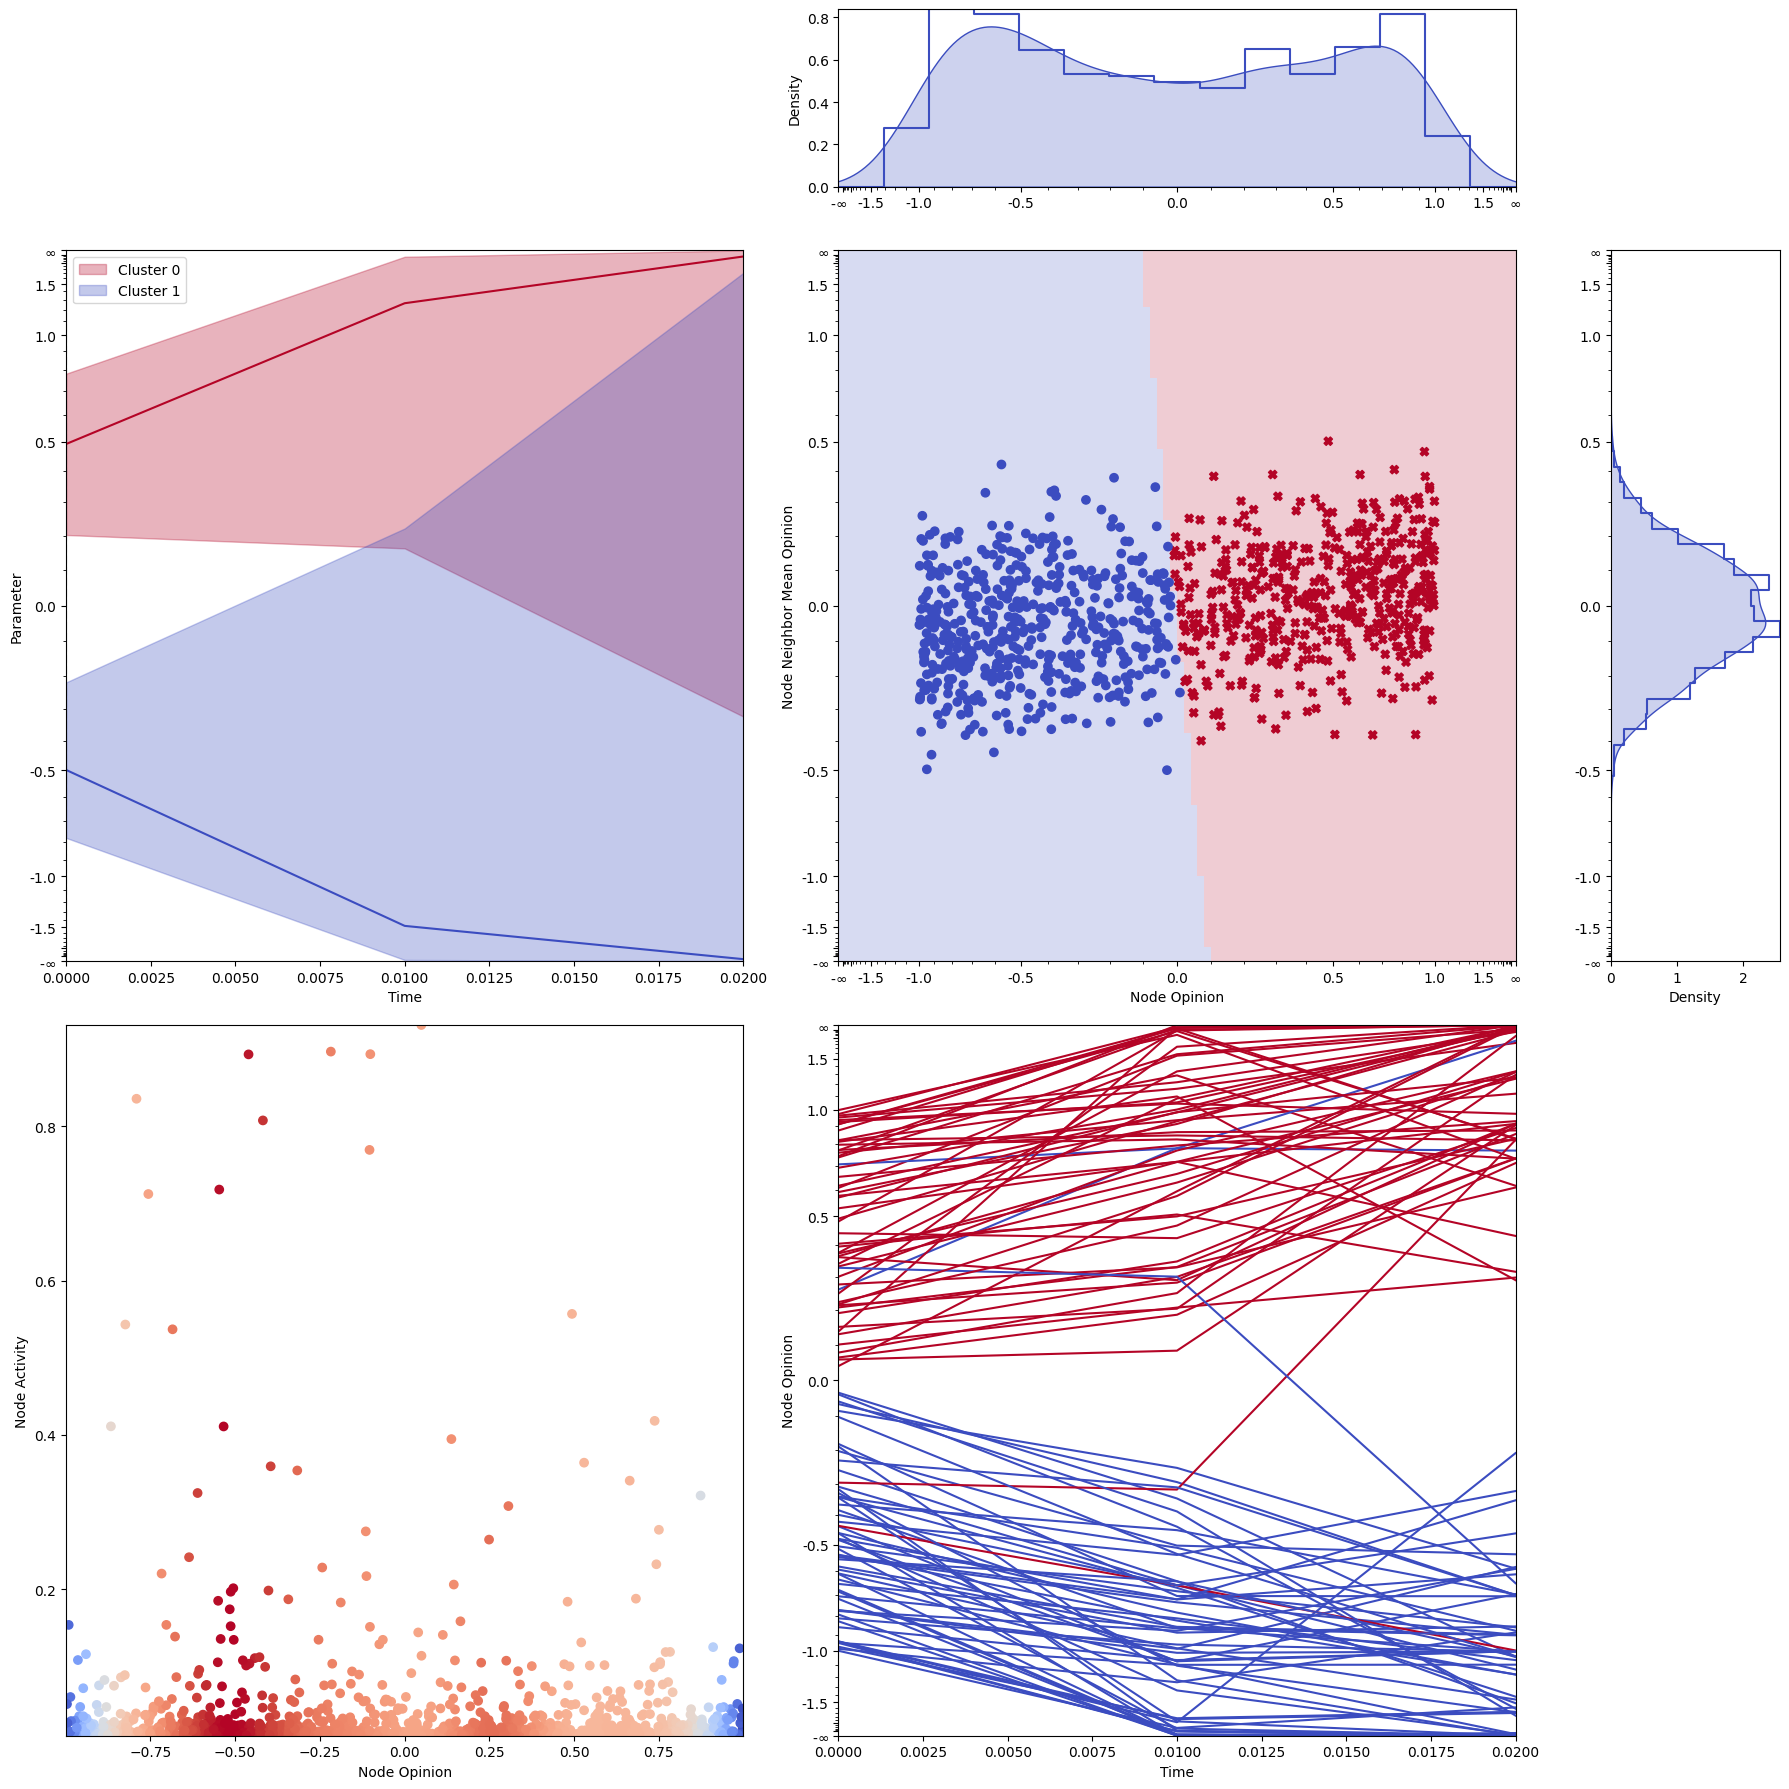

/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:897: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 0] = np.arctanh(mesh_points_scaled[:, 0])
/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:899: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 1] = np.arctanh(mesh_points_scaled[:, 1])


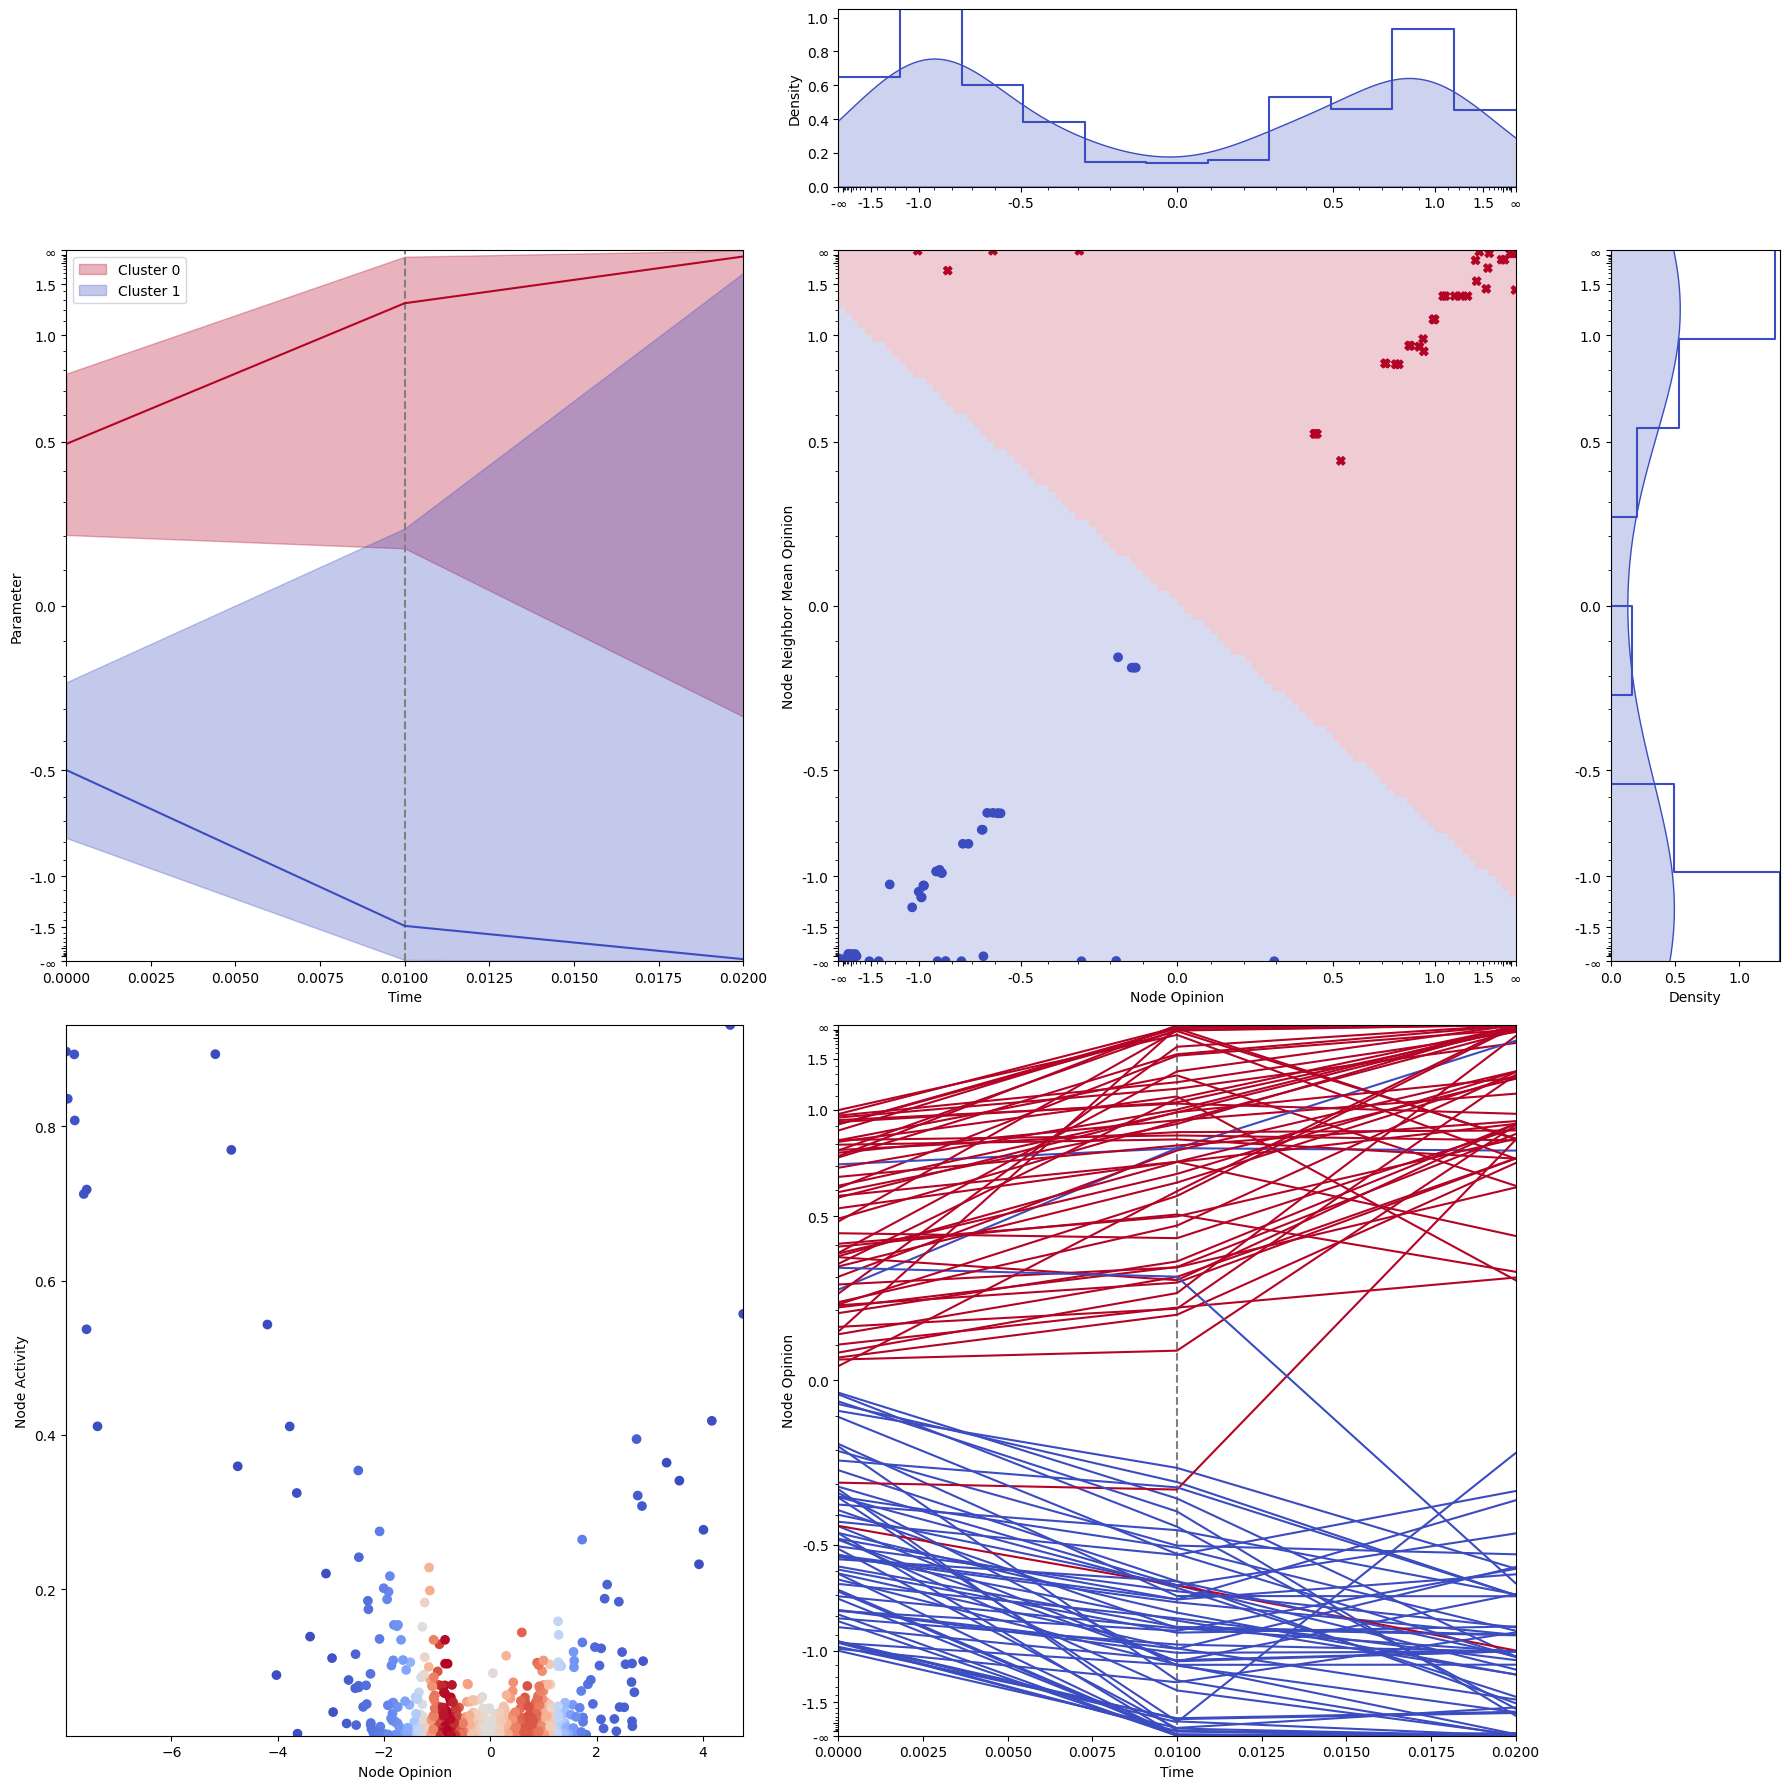

/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:897: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 0] = np.arctanh(mesh_points_scaled[:, 0])
/home/ivan/Projects/hari-plotter/hari_plotter/plot.py:899: RuntimeWarning: divide by zero encountered in arctanh
  mesh_points_scaled[:, 1] = np.arctanh(mesh_points_scaled[:, 1])


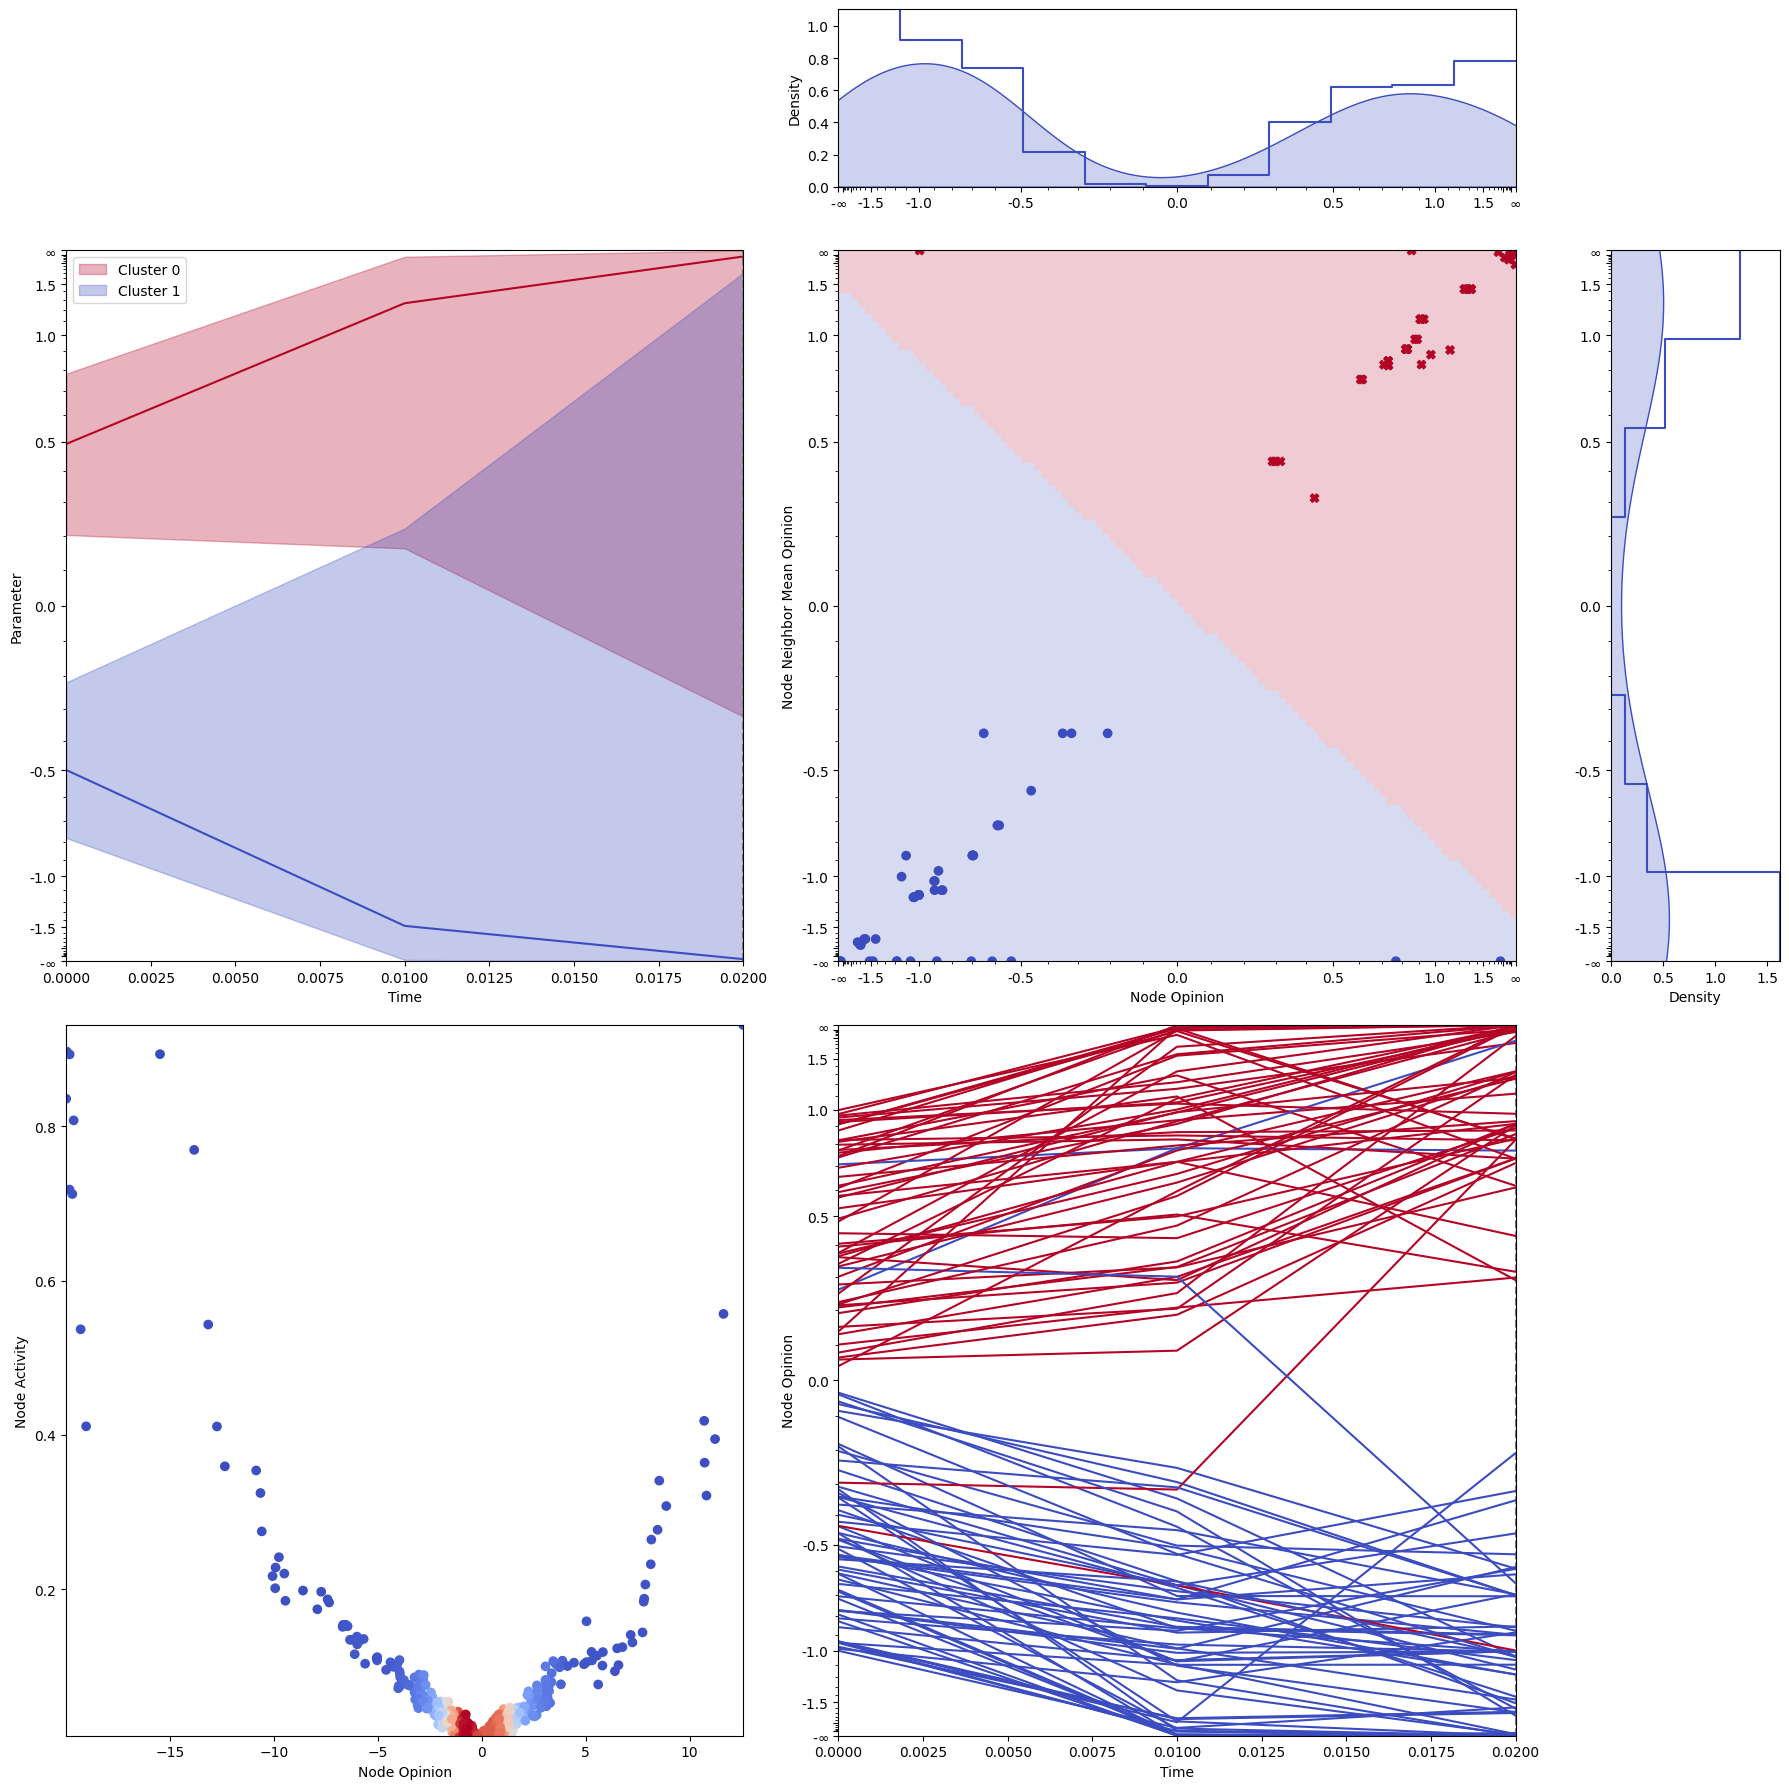

In [12]:
plotter.plot_dynamics(
    mode=["show", "save", "gif"],
    save_dir="save_dir",
    gif_path="save_dir/gif.gif",
)